<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#The-leaky-integrate-and-ﬁre-(LIF)" data-toc-modified-id="The-leaky-integrate-and-ﬁre-(LIF)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>The leaky integrate-and-ﬁre (LIF)</a></span><ul class="toc-item"><li><span><a href="#Simulate" data-toc-modified-id="Simulate-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Simulate</a></span></li></ul></li></ul></div>

# The leaky integrate-and-ﬁre (LIF)

The leaky integrate-and-ﬁre (LIF) neuron is probably one of the simplest spiking neuron
models, but it is still very popular due to the ease with which it can be analyzed and simulated. In its simplest form, a neuron is modeled as a “leaky integrator” of its input $I(t)$:

\begin{equation}
\tau_{m} \frac{dv}{dt} = - v(t) + RI(t)
\end{equation}

where $v(t)$ represents the membrane potential at time $t$, $\tau_m$ is the membrane time constant and $R$ is the membrane resistance. This equation describes a simple resistor-capacitor (RC) circuit where the leakage term is due to the resistor and the integration of $I(t)$ is due to the capacitor that is in parallel to the resistor.

we know that $v(t) = u(t) - u_{rest}$ , $I(t)= I_{0}$ . we want solve equation(1):
\begin{equation}
v(t)= R.I_0(1− e^{-\frac{(t - t_{0})}{\tau_{m}}})=u(t)− u_{rest}
\end{equation}
so we have :
\begin{equation}
R.I_0(1− e^{-\frac{(t - t_{0})}{\tau_{m}}})+ u_{rest}= u(t)
\end{equation}

You can find solution of ODE in [stackexchange](https://math.stackexchange.com/questions/2885170/how-to-solve-the-leaky-integrate-and-fire-ode).

## Simulate

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Init variables
T       =   1000.00000                     # total simulation length [s]
dt      =   0.00005                       #  step size [s]
time    =   np.arange(0, T+dt, dt)        # step values [s]

t_spike =   []           #when we have spike add them to this list
I_spike =   []           #when we have spike add them to this list
F_spike =   []

R       =    100
t_m     =    100

u_rest  =    25

I       =    np.zeros(len(time))

V       =    np.empty(len(time))
V[0]    =    0

U       =    np.empty(len(time))

thetha  =    350

In [3]:
# reset variables 
def init_vars():
    global t_spike
    t_spike =   []
    global I_spike
    I_spike =   []
    global I      
    I = np.zeros(len(time))
    global V      
    V = np.empty(len(time))
    V[0] = 0
    global U 
    U = np.empty(len(time))

In [4]:
# update I when a new flow came in system
#t_start : when flow come in system
#t_end : when flow come out from  system

def enter_I(t_start,t_finist,I_input):
    start  = int(t_start/dt)
    finist = int(t_finist/dt)
    n = int(T/dt)
    
    if start > n:
        start = n
        
    if finist > n:
        finist = n
    
    I[start:finist]  =  I[start:finist] + I_input

In [5]:
# simulate neuron without spike
def simulate():
    global U
    t0 = time[0]
    for i,t in enumerate(time):
        V[i] = R * I[i] *(1 - np.exp((-(t-t0)/t_m)))
        U[i] = V[i] - u_rest

In [6]:
# make pandas dataframe for save results
def make_dataframe():
    data = pd.DataFrame(data = {'u': U , 'time':time , 'I':I})
    data['u'] = data['u'].round(4)
    data = data.set_index('time')
    return data 

In [7]:
# plot "I(t)-time" & "U(t)-time"
def plot(data):
    fig, axes = plt.subplots(nrows=0, ncols=0,figsize=(25,15))
    fig.suptitle('Results', fontsize=25)

    f1 = data.plot(kind='line',y='u',color='red'
            ,title = 'U-time',figsize=(15,5)).set_ylabel('U(t)')

    plt.show()
        
    f2 = data.plot(kind='line',y='I',color='blue'
            ,title = 'I-time',figsize=(15,5)).set_ylabel('I(t)')

<Figure size 1800x1080 with 0 Axes>

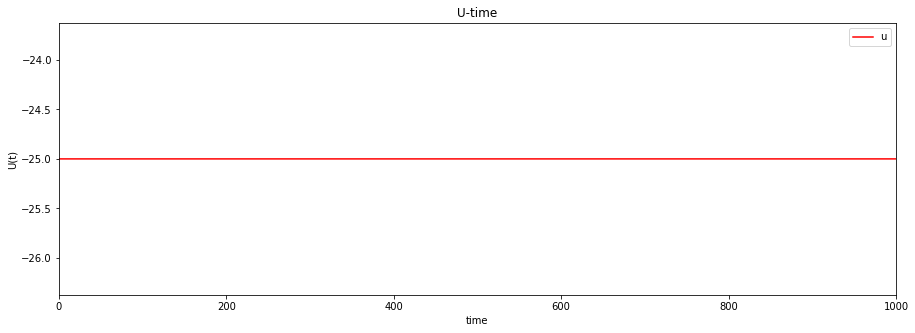

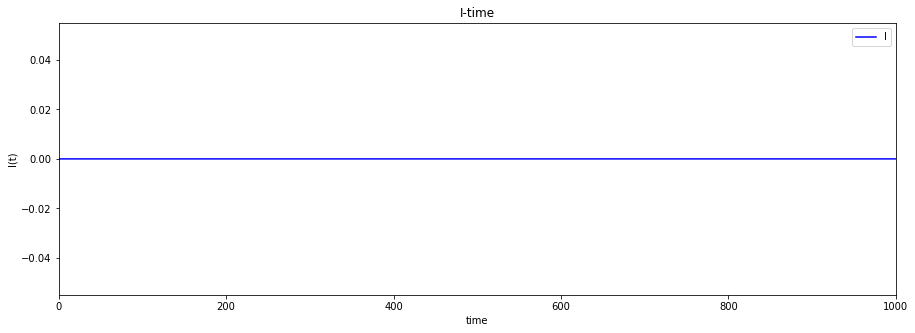

In [8]:
#first simulate
#I = 0A

init_vars()
enter_I(0,T+dt,0)
simulate()
data = make_dataframe()
plot(data)

<Figure size 1800x1080 with 0 Axes>

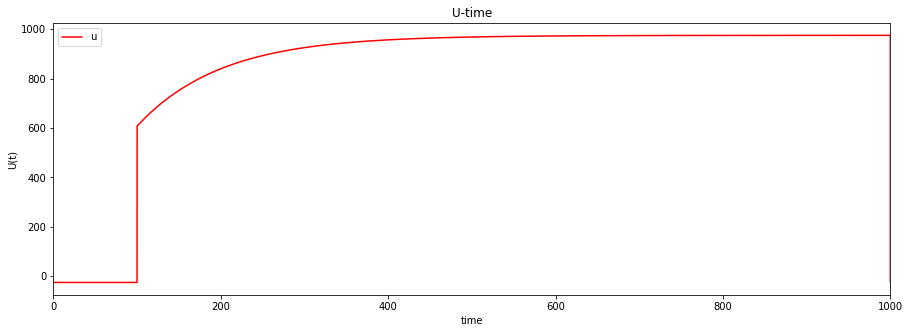

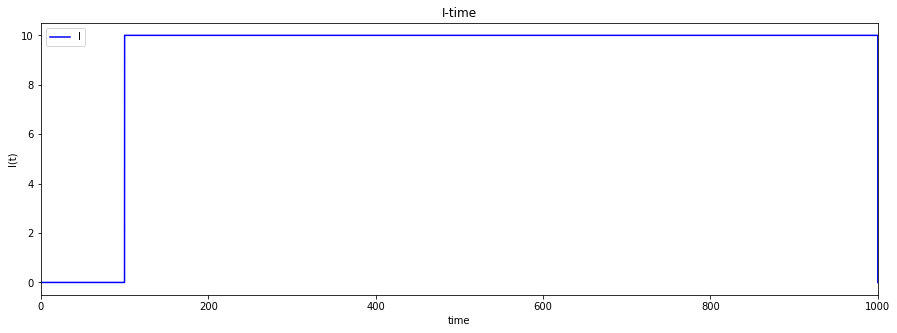

In [9]:
#second simulate
#I = 100A
#I enter from 100s to 1000(end).

init_vars()
enter_I(100,T+dt,10)
simulate()
data = make_dataframe()
plot(data)